In [1]:
# Libraries and stuff

import numpy as np
import numpy.ma as ma

import matplotlib.pyplot as plt
from matplotlib import ticker
import random

# Remove warning and live a happy life
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

Based on the work of Cornish and Fisher in 1937, we derive a set of basis functions linking changes in percentiles of a distribution to changes in its first moments. These basis are the first 4 Hermite polynomials of a variable $z_{q}$. $z_{q}$ is defined as the quantile function of a standard normal $N[0,1]$,i.e., $z_{q} = Q(N[0,1],q)$.

In this notebook we test the main methodology by

(a) defining synthetic time series with changes in moments over time;

(b) computing quantile regression and providing confidence bounds for the quantiles trends;

(c) reducing the dimensionality of the large number of quantile slopes onto 4 basis. These basis quantify how changes in quantiles of a distributions are driven by changes in its moments.

Theory and derivation behind all of this can be found in the pdf document in this folder. 

# Sections in this notebook:

### Synthetic time series

Here we define the functions to sample from two time-dependent distribution (i.e., a Gaussian and Beta distribution).

### Quantile regression and moments contribution

Here we test the main method: first we define a time-dependent process by random sampling from a drifting distribution, then we apply quantile regression onto this time series. Finally we condense quantile trends onto a set of basis function, quantifying the main drivers of such changes.

#### Time dependent Gaussian distribution

Example with Gaussian distribution.

#### Time dependent Beta distribution

Example with Beta distribution.

### Quantify significance of quantile regression

Here we quantify significance and confidence bounds for some quantile trends (specifically for the $q = 0.01$ and $q = 0.99$ quantiles)

### Main plots

Plot(s) to be summarize these tests.

# Synthetic time series

In [1]:
# Sample from a gaussian drifting in time

def drifting_gaussian(a,b,time_vector):
    
    # input:
    # a: slope in the mean
    # b: slope in the variance
    # n: number of time steps
    
    # time series
    ts = []
    
    for t in time_vector:
        
        # mean
        mu = a*t
        # standard deviation
        sigma = np.sqrt(b*t)
        # random sample from the distribution
        ts.append(np.random.normal(loc=mu, scale=sigma, size=None))
    
    ts = np.array(ts)
    
    return ts

In [2]:
# Sample from a beta distribution drifting in time

import scipy.stats

def drifting_beta(a,b,time_vector):
    
    # We define a a skewed normal distribution dependent only of alpha: mu = 0 and sigma = 1

    # input:
    # a: slope
    # time: time range (e.g, np.arange(dt,n+dt,dt))
    
    # time series
    ts = []
    
    for t in time_vector:
        
        # alpha parameter time dependendent
        alpha = a*t #a*(t**2)
        beta = b*t #a*(t**2)
        
        ts.append(scipy.stats.beta.rvs(alpha, beta, loc=0, scale=1))
    
    ts = np.array(ts)
    
    return ts

# Quantile regression and moments contribution

In [3]:
import utils

## Time dependent Gaussian distribution

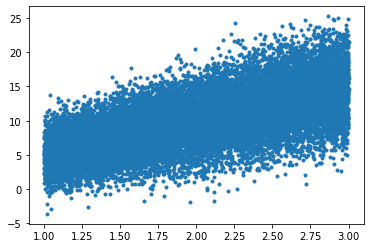

In [6]:
a = 5
b = 5
#n = 20
#dt = 0.001
dt = 0.0001

time_vector = np.arange(1+dt,3.+dt,dt)

ts = drifting_gaussian(a,b,time_vector)
xt = time_vector

plt.plot(xt,ts,'.')

In [111]:
xt = time_vector
xt = xt - xt[0]
yt = ts
dq = 0.01
qs = np.arange(dq, 1.00, dq)
n = 500

In [113]:
import utils
coeffs, sigs, trends, slopes = utils.changes_in_moments(xt,yt,n,qs)

Computing quantile regression for original time series
Computing projection onto basis for original time series
Statistical significance started
Quantile regression on the bootstrapped time series
Projection onto basis for the bootstrapped time series
Done


Coefficients
Slopes from mean: 5.079996434618198
Slopes from variance: 1.488907675428612
Slopes from skewness: -0.09007314846587366
Slopes from kurtosis: -0.041779617481082956

Significance
Slopes from mean; significant?: True
Slopes from variance; significant?: True
Slopes from skewness; significant?: False
Slopes from kurtosis; significant?: False


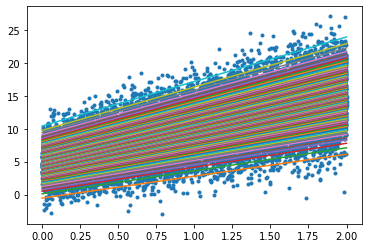

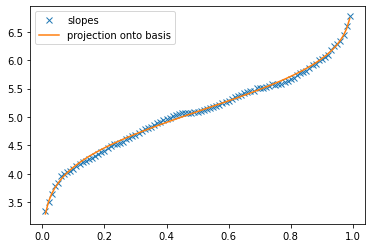

In [114]:
basis = utils.basis_functions(qs)

print('Coefficients')
print('Slopes from mean: '+str(coeffs[0]))
print('Slopes from variance: '+str(coeffs[1]))
print('Slopes from skewness: '+str(coeffs[2]))
print('Slopes from kurtosis: '+str(coeffs[3]))

print('')
print('Significance')
print('Slopes from mean; significant?: '+str(sigs[0]))
print('Slopes from variance; significant?: '+str(sigs[1]))
print('Slopes from skewness; significant?: '+str(sigs[2]))
print('Slopes from kurtosis; significant?: '+str(sigs[3]))

plt.plot(xt,yt,'.')

for i in range(len(trends)):
    plt.plot(xt,trends[i])
plt.show()

plt.plot(qs,slopes,'x',label='slopes')
#plt.plot(qs,coeffs[0]*basis[0]+coeffs[1]*basis[1],'-',label='regressed first basis + second basis')
plt.plot(qs,np.transpose(utils.basis_functions(qs))@coeffs,label='projection onto basis')
plt.legend()
plt.show()

In [116]:
np.save('./results/drifting_gaussian/coeffs.npy',coeffs)
np.save('./results/drifting_gaussian/slopes.npy',slopes)
np.save('./results/drifting_gaussian/ts.npy',ts)
np.save('./results/drifting_beta/trends.npy',trends)

## Time dependent Beta distribution

In [79]:
import utils

In [90]:
time_vector.shape

(20000,)

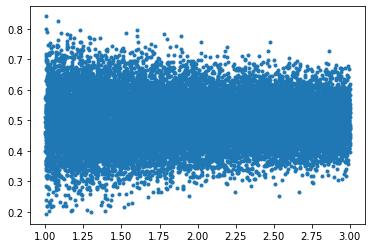

In [103]:
a = 10
b = 10
dt = 0.0001

time_vector = np.arange(1+dt,3.+dt,dt)

ts = drifting_beta(a,b,time_vector)

plt.plot(time_vector,ts,'.')
plt.show()

In [104]:
xt = time_vector
xt = xt - xt[0]
yt = ts
dq = 0.01
qs = np.arange(dq, 1.00, dq)
n = 500

In [105]:
coeffs, sigs, trends, slopes = utils.changes_in_moments(xt,yt,n,qs)

Computing quantile regression for original time series
Computing projection onto basis for original time series
Statistical significance started
Quantile regression on the bootstrapped time series
Projection onto basis for the bootstrapped time series
Done


Coefficients
Slopes from mean: -0.0016998582898163418
Slopes from variance: -0.035516744880146854
Slopes from skewness: -0.0007533437552276548
Slopes from kurtosis: -0.020777829637735962

Significance
Slopes from mean; significant?: False
Slopes from variance; significant?: True
Slopes from skewness; significant?: False
Slopes from kurtosis; significant?: True


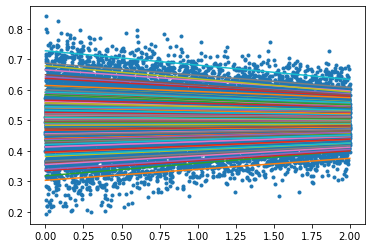

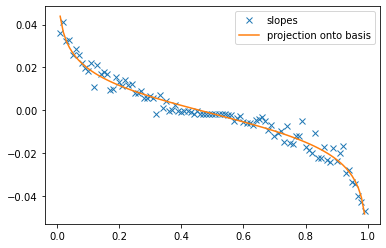

In [107]:
basis = utils.basis_functions(qs)

print('Coefficients')
print('Slopes from mean: '+str(coeffs[0]))
print('Slopes from variance: '+str(coeffs[1]))
print('Slopes from skewness: '+str(coeffs[2]))
print('Slopes from kurtosis: '+str(coeffs[3]))

print('')
print('Significance')
print('Slopes from mean; significant?: '+str(sigs[0]))
print('Slopes from variance; significant?: '+str(sigs[1]))
print('Slopes from skewness; significant?: '+str(sigs[2]))
print('Slopes from kurtosis; significant?: '+str(sigs[3]))

plt.plot(xt,yt,'.')

for i in range(len(trends)):
    plt.plot(xt,trends[i])
plt.show()

plt.plot(qs,slopes,'x',label='slopes')
#plt.plot(qs,coeffs[0]*basis[0]+coeffs[1]*basis[1],'-',label='regressed first basis + second basis')
plt.plot(qs,np.transpose(utils.basis_functions(qs))@coeffs,label='projection onto basis')
plt.legend()
plt.show()

In [109]:
np.save('./results/drifting_beta/coeffs.npy',coeffs)
np.save('./results/drifting_beta/slopes.npy',slopes)
np.save('./results/drifting_beta/ts.npy',ts)
np.save('./results/drifting_beta/trends.npy',trends)

In [ ]:
basis = utils.basis_functions(qs)

print('Coefficients')
print('Slopes from mean: '+str(coeffs[0]))
print('Slopes from variance: '+str(coeffs[1]))
print('Slopes from skewness: '+str(coeffs[2]))
print('Slopes from kurtosis: '+str(coeffs[3]))

print('')
print('Significance')
print('Slopes from mean; significant?: '+str(sigs[0]))
print('Slopes from variance; significant?: '+str(sigs[1]))
print('Slopes from skewness; significant?: '+str(sigs[2]))
print('Slopes from kurtosis; significant?: '+str(sigs[3]))

plt.plot(xt,yt,'.')

for i in range(len(trends)):
    plt.plot(xt,trends[i])
plt.show()

plt.plot(qs,slopes,'x',label='slopes')
#plt.plot(qs,coeffs[0]*basis[0]+coeffs[1]*basis[1],'-',label='regressed first basis + second basis')
plt.plot(qs,np.transpose(utils.basis_functions(qs))@coeffs,label='projection onto basis')
plt.legend()
plt.show()

# Quantify significance of quantile regression

For the two examples (i.e., drifting normal and beta distributions) we quantify the significance and confidence bounds of the 0.01 and 0.99 percentiles trends. Useful to add in the main plot.

In [7]:
import utils

In [254]:
# Load data

# Gaussian case
# Time series
ts_gaussian = np.load('./results/drifting_gaussian/ts.npy')

# Beta case
# Time series
ts_beta = np.load('./results/drifting_beta/ts.npy')

## Time-dependent Gaussian distribution

In [255]:
dt = 0.0001
xt = np.arange(1+dt,3.+dt,dt)
yt = ts_gaussian
n = 500

In [16]:
q = 0.01
y_predicted_g_0p01, slope_g_0p01, significance_g_0p01, upper_bound_g_0p01, lower_bound_g_0p01 = utils.q_regression_significance(xt,yt,q,n)

print('quantile: '+str(q))
print('slope: '+str(slope_g_0p01))
print('significant: '+str(significance_g_0p01))
print('upper bound: '+str(upper_bound_g_0p01))
print('lower bound: '+str(lower_bound_g_0p01))

quantile: 0.01
slope: 3.3363592672327655
significant: True
upper bound: 3.596752338429506
lower bound: 3.085818981262491


In [21]:
q = 0.99
y_predicted_g_0p99, slope_g_0p99, significance_g_0p99, upper_bound_g_0p99, lower_bound_g_0p99 = utils.q_regression_significance(xt,yt,q,n)

print('quantile: '+str(q))
print('slope: '+str(slope_g_0p99))
print('significant: '+str(significance_g_0p99))
print('upper bound: '+str(upper_bound_g_0p99))
print('lower bound: '+str(lower_bound_g_0p99))

quantile: 0.99
slope: 6.77293507631552
significant: True
upper bound: 7.062333857391039
lower bound: 6.481441342340989


## Time-dependent Beta distribution

In [30]:
dt = 0.0001
xt = np.arange(1+dt,3.+dt,dt)
yt = ts_beta
n = 500

In [31]:
q = 0.01
y_predicted_b_0p01, slope_b_0p01, significance_b_0p01, upper_bound_b_0p01, lower_bound_b_0p01 = utils.q_regression_significance(xt,yt,q,n)

print('quantile: '+str(q))
print('slope: '+str(slope_b_0p01))
print('significant: '+str(significance_b_0p01))
print('upper bound: '+str(upper_bound_b_0p01))
print('lower bound: '+str(lower_bound_b_0p01))

quantile: 0.01
slope: 0.03608097556559242
significant: True
upper bound: 0.04472950579212011
lower bound: 0.027560127644666033


In [32]:
q = 0.99
y_predicted_b_0p99, slope_b_0p99, significance_b_0p99, upper_bound_b_0p99, lower_bound_b_0p99 = utils.q_regression_significance(xt,yt,q,n)

print('quantile: '+str(q))
print('slope: '+str(slope_b_0p99))
print('significant: '+str(significance_b_0p99))
print('upper bound: '+str(upper_bound_b_0p99))
print('lower bound: '+str(lower_bound_b_0p99))

quantile: 0.99
slope: -0.04698644100645577
significant: True
upper bound: -0.037906796748211714
lower bound: -0.05672242340058686


# Main plots

Here we add a plot for the method section. 
The goal is to provide (a) a schematic the methodology and (b) a test with a synthetic dataset.

In [256]:
# Define the time vector
dt = 0.0001
xt = np.arange(1+dt,3.+dt,dt)

# Load data

# Gaussian case
# Time series
ts_gaussian = np.load('./results/drifting_gaussian/ts.npy')

# Beta case
# Time series
ts_beta = np.load('./results/drifting_beta/ts.npy')

# load slopes, coefficients (significance has been computed in the section above, give a look)

# Gaussian case
slopes_gaussian = np.load('./results/drifting_gaussian/slopes.npy') #slopes from quantile regression
coeffs_gaussian = np.load('./results/drifting_gaussian/coeffs.npy') #coeffs of basis functions

# Beta case
slopes_beta = np.load('./results/drifting_beta/slopes.npy') #slopes from quantile regression
coeffs_beta = np.load('./results/drifting_beta/coeffs.npy') #coeffs of basis functions

In [257]:
dq = 0.01
qs = np.arange(dq, 1.00, dq)
basis = utils.basis_functions(qs)

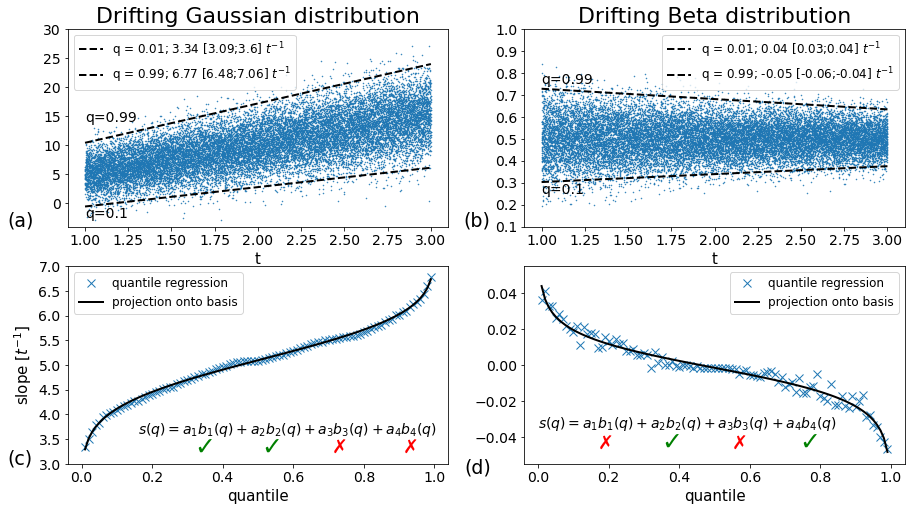

In [263]:
fig = plt.figure(figsize=(15,8))

fontsize_legend = 12
fontsize_ticks = 14
fontsize_axis_label = 15
fontsize_title_label = 15
fontsize_title = 22

################################# Drifting Gaussian time series

ax = fig.add_subplot(221)

ax.plot(xt,ts_gaussian,".",markersize = 1)
plt.xlabel('t',fontsize = fontsize_axis_label)
plt.xticks(fontsize = fontsize_ticks)
plt.title('Drifting Gaussian distribution', fontsize = fontsize_title)
plt.ylim([-4,30])
plt.xticks(fontsize = fontsize_ticks)
plt.yticks(fontsize = fontsize_ticks)
ax.text(1.0, -2.5, 'q=0.1', fontsize=14)
ax.text(1.0, 14, 'q=0.99', fontsize=14)

ax.text(0.55, -4, '(a)', fontsize=19)

# add linear regression over the 0.01 and 0.99 quantiles
# quantiles computed in the section above
ax.plot(xt,y_predicted_g_0p01,"--k",linewidth = 2,label='q = 0.01; '+str(np.round(slope_g_0p01,2))+' ['+str(np.round(lower_bound_g_0p01,2))+';'+str(np.round(upper_bound_g_0p01,2))+'] $t^{-1}$') 
ax.plot(xt,y_predicted_g_0p99,"--k",linewidth = 2,label='q = 0.99; '+str(np.round(slope_g_0p99,2))+' ['+str(np.round(lower_bound_g_0p99,2))+';'+str(np.round(upper_bound_g_0p99,2))+'] $t^{-1}$')
plt.legend(fontsize = fontsize_legend)

################################# Drifting Beta time series

ax = fig.add_subplot(222)

ax.plot(xt,ts_beta,".",markersize = 1)
plt.xlabel('t',fontsize = fontsize_axis_label)
plt.xticks(fontsize = fontsize_ticks)
plt.ylim([0.1,1])
plt.title('Drifting Beta distribution', fontsize = fontsize_title)
plt.xticks(fontsize = fontsize_ticks)
plt.yticks(fontsize = fontsize_ticks)
ax.text(1, 0.25, 'q=0.1', fontsize=14)
ax.text(1, 0.75, 'q=0.99', fontsize=14)

ax.text(0.55, 0.1, '(b)', fontsize=19)

# add linear regression over the 0.01 and 0.99 quantiles
# quantiles computed in the section above
ax.plot(xt,y_predicted_b_0p01,"--k",linewidth = 2,label='q = 0.01; '+str(np.round(slope_b_0p01,2))+' ['+str(np.round(lower_bound_b_0p01,2))+';'+str(np.round(upper_bound_b_0p01,2))+'] $t^{-1}$') 
ax.plot(xt,y_predicted_b_0p99,"--k",linewidth = 2,label='q = 0.99; '+str(np.round(slope_b_0p99,2))+' ['+str(np.round(lower_bound_b_0p99,2))+';'+str(np.round(upper_bound_b_0p99,2))+'] $t^{-1}$')
plt.legend(loc = 'upper right',fontsize = fontsize_legend)

################################# Quantile slopes + projection onto basis Gaussian case

ax = fig.add_subplot(223)

ax.plot(qs,slopes_gaussian,"x",markersize = 8,label = 'quantile regression')
ax.plot(qs,np.transpose(utils.basis_functions(qs))@coeffs_gaussian,"-k",linewidth = 2,label = 'projection onto basis')
plt.xlabel('quantile',fontsize = fontsize_axis_label)
plt.ylabel('slope [$t^{-1}$]',fontsize = fontsize_axis_label)
plt.ylim([3,7])
plt.xticks(fontsize = fontsize_ticks)
plt.xticks(fontsize = fontsize_ticks)
plt.yticks(fontsize = fontsize_ticks)
plt.legend(loc = 'upper left',fontsize = fontsize_legend)

ax.text(-0.21, 3.0, '(c)', fontsize=19)

ax.text(0.16, 3.6, '$s(q)=a_{1}b_{1}(q)+a_{2}b_{2}(q)+a_{3}b_{3}(q)+a_{4}b_{4}(q)$', fontsize=14)
ax.text(0.32, 3.2, u'\u2713',c = 'g', fontsize=25)
ax.text(0.51, 3.2, u'\u2713',c = 'g', fontsize=25)
ax.text(0.71, 3.2, u'\u2717',c = 'r', fontsize=19)
ax.text(0.91, 3.2, u'\u2717',c = 'r', fontsize=19)

################################# Quantile slopes + projection onto basis Gaussian case

ax = fig.add_subplot(224)

ax.plot(qs,slopes_beta,"x",markersize = 8,label = 'quantile regression')
ax.plot(qs,np.transpose(utils.basis_functions(qs))@coeffs_beta,"-k",linewidth = 2,label = 'projection onto basis')
plt.xlabel('quantile',fontsize = fontsize_axis_label)
#plt.ylabel('slope [$t^{-1}$]',fontsize = fontsize_axis_label)
plt.ylim([-0.055,0.055])
plt.xticks(fontsize = fontsize_ticks)
plt.xticks(fontsize = fontsize_ticks)
plt.yticks(fontsize = fontsize_ticks)
plt.legend(loc = 'upper right',fontsize = fontsize_legend)

ax.text(-0.21, -0.06, '(d)', fontsize=19)

ax.text(0., -.035, '$s(q)=a_{1}b_{1}(q)+a_{2}b_{2}(q)+a_{3}b_{3}(q)+a_{4}b_{4}(q)$', fontsize=14)
ax.text(0.17, -.047, u'\u2717',c = 'r', fontsize=19)
ax.text(0.35, -.047, u'\u2713',c = 'g', fontsize=25)
ax.text(0.55, -.047, u'\u2717',c = 'r', fontsize=19)
ax.text(0.74, -.047, u'\u2713',c = 'g', fontsize=25)

fig.savefig('./figures/synthetic_data.png',bbox_inches='tight')